Nikwe T 22309434

LINK:
1. https://oecd.ai/en/data?visualizationFiltersHash=eyJlbnRpdGllcyI6eyJjb3VudHJ5IjpbIkVVMjciLCJDSE4iLCJVU0EiLCJKUE4iLCJJTkQiLCJHQlIiLCJERVUiLCJGUkEiLCJDQU4iLCJaQUYiXX19

2. https://fred.stlouisfed.org/series/LFEAICTTZAA647S

TASK 2   Forecasting Employment Trends

Why is this dataset relevant to the theme:
the first dataset Shows how employment levels(i experienced a lot of difficulty with the unemployment dataset i am deeply sorry) have changed historically and it shows a measure of how quickly AI is spreading globally including South Africa,therefore i can use this dataset to measure the AI growth and reach, which i can connect to employment trends to forecast which jobs in South Africa are most at risk or likely to grow.
while the second one directly provides historical data on employment levels across all industries in South Africa over time (from 2000 to 2024).unfortunartely i couldnt find one dataset that tracks both unemployment in industries while tracking A.I affected industries

Code to load the saved Linear Regression model for use in your dashboard.

In [38]:
import joblib
import os

# Define the filename of the saved model
model_filename = 'linear_regression_employment_forecast_model.joblib'

# Check if the model file exists before loading
if os.path.exists(model_filename):
    # Load the model from the file
    loaded_model = joblib.load(model_filename)
    print(f"Model loaded successfully from {model_filename}")
else:
    print(f"Error: Model file not found at {model_filename}. Please ensure the file is in the correct path.")
    loaded_model = None # Set to None if loading failed

Model loaded successfully from linear_regression_employment_forecast_model.joblib


Saving the trained Linear Regression model.

In [36]:
import joblib
import os

# Define the filename for the saved model
model_filename = 'linear_regression_employment_forecast_model.joblib'

# Save the model to the specified filename
joblib.dump(model, model_filename)

print(f"Model saved successfully to {model_filename}")

# (Optional) Verify the file exists
if os.path.exists(model_filename):
    print("Saved model file confirmed to exist.")
else:
    print("Error: Saved model file not found.")

Model saved successfully to linear_regression_employment_forecast_model.joblib
Saved model file confirmed to exist.


 importing the pandas library
 upload and read the CSV file, and if the file is not found occurs print an error message.Then displays the first 5 rows

In [11]:
import pandas as pd

try:
    df_new = pd.read_csv("/content/drive/MyDrive/t/LFEAICTTZAA647S.csv")
    print("New dataset loaded successfully!")
    display(df_new.head())
except FileNotFoundError:
    print("Error: The new file was not found at the specified path. Please double-check the file path.")
except Exception as e:
    print(f"An error occurred while loading the new dataset: {e}")

print("\nSecond dataset (df):")
try:
    df = pd.read_csv("/content/drive/MyDrive/t/data.csv")
    print("Data loaded successfully!")
    display(df.head())
except FileNotFoundError:
    print("Error: The file was not found at the specified path. Please double-check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")

New dataset loaded successfully!


,observation_date,LFEAICTTZAA647S
0,2000-01-01,2973000.0
1,2001-01-01,2963000.0
2,2002-01-01,2991000.0
3,2003-01-01,2940000.0
4,2004-01-01,3089000.0



Second dataset (df):
Data loaded successfully!


,ai_concept,Country,Country_label,impact_level,pub_type,publications,year
0,All AI research,USA,United States,All works,Dataset,5.0,2001
1,All AI research,USA,United States,All works,Dataset,6.0,2002
2,All AI research,USA,United States,All works,Dataset,0.0,2003
3,All AI research,USA,United States,All works,Dataset,8.0,2004
4,All AI research,USA,United States,All works,Dataset,2.0,2005


displaying the tail of the two datasets

In [14]:
print("Tail of df_new:")
display(df_new.tail())

print("\nTail of df:")
display(df.tail())

Tail of df_new:


,observation_date,LFEAICTTZAA647S
20,2020-01-01,3199012.0
21,2021-01-01,3035041.0
22,2022-01-01,3290365.0
23,2023-01-01,3405439.0
24,2024-01-01,3512133.0



Tail of df:


,ai_concept,Country,Country_label,impact_level,pub_type,publications,year
148,All AI research,CHE,Switzerland,All works,Dataset,17.733334,2022
149,All AI research,CHE,Switzerland,All works,Dataset,38.542857,2023
150,All AI research,CHE,Switzerland,All works,Dataset,7.000000,2024
151,All AI research,ZAF,South Africa,All works,Dataset,4.000000,2021
152,All AI research,ZAF,South Africa,All works,Dataset,8.044444,2023


displaying the info of the two datasets

In [12]:
print("Information for df_new:")
display(df_new.info())

print("\nInformation for df:")
display(df.info())

Information for df_new:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  25 non-null     object 
 1   LFEAICTTZAA647S   25 non-null     float64
dtypes: float64(1), object(1)
memory usage: 532.0+ bytes


None


Information for df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ai_concept     153 non-null    object 
 1   Country        153 non-null    object 
 2   Country_label  153 non-null    object 
 3   impact_level   153 non-null    object 
 4   pub_type       153 non-null    object 
 5   publications   153 non-null    float64
 6   year           153 non-null    int64  
dtypes: float64(1), int64(1), object(5)
memory usage: 8.5+ KB


None

Displaying the shapes of the two datasets

In [13]:
print("Shape of df_new:", df_new.shape)
 print("Shape of df:", df.shape)

Shape of df_new: (25, 2)
Shape of df: (153, 7)


use boxplots to check for outliers in both datasets

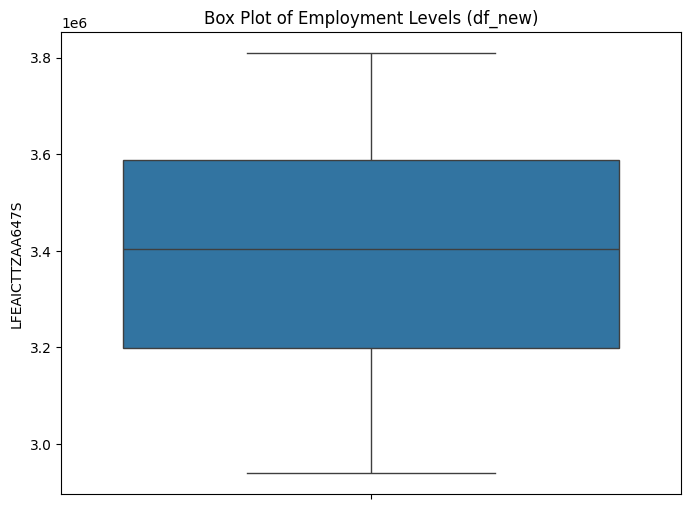

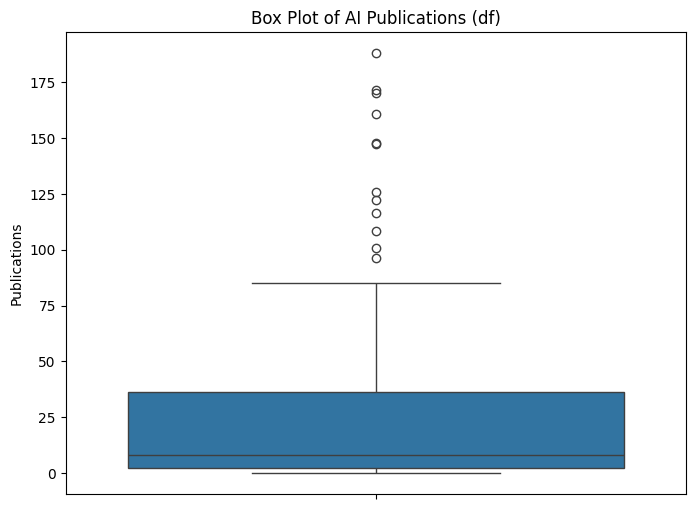

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Box plot for LFEAICTTZAA647S in df_new
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_new['LFEAICTTZAA647S'])
plt.title('Box Plot of Employment Levels (df_new)')
plt.ylabel('LFEAICTTZAA647S')
plt.show()

# Box plot for publications in df
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['publications'])
plt.title('Box Plot of AI Publications (df)')
plt.ylabel('Publications')
plt.show()

Checking for null values in both datasets.

In [16]:
print("Null values in df_new:")
display(df_new.isnull().sum())

print("\nNull values in df:")
display(df.isnull().sum())

Null values in df_new:


,0
observation_date,0
LFEAICTTZAA647S,0



Null values in df:


,0
ai_concept,0
Country,0
Country_label,0
impact_level,0
pub_type,0
publications,0
year,0


Checking for duplicate rows in both datasets.

In [17]:
print("Number of duplicate rows in df_new:", df_new.duplicated().sum())

print("\nNumber of duplicate rows in df:", df.duplicated().sum())

Number of duplicate rows in df_new: 0

Number of duplicate rows in df: 0


changing the name of a column

In [19]:
df_new['observation_date'] = pd.to_datetime(df_new['observation_date'])

# Display the info to confirm the data type has changed
print("Information for df_new after date conversion:")
display(df_new.info())

Information for df_new after date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   observation_date  25 non-null     datetime64[ns]
 1   LFEAICTTZAA647S   25 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 532.0 bytes


None

Aggregating the df dataset by year and merging with df_new

In [24]:
# Aggregate df by year, summing publications
df_aggregated = df.groupby('year')['publications'].sum().reset_index()
df_aggregated.rename(columns={'publications': 'total_global_publications'}, inplace=True)

print("Aggregated df (head):")
display(df_aggregated.head())

# Extract year from the observation_date in df_new (if not already done)
if 'year' not in df_new.columns:
    df_new['year'] = df_new['observation_date'].dt.year

# Merge the two dataframes on the 'year' column
merged_df = pd.merge(df_new, df_aggregated, on='year', how='inner')

print("\nMerged DataFrame (head):")
display(merged_df.head())

print("\nInformation for Merged DataFrame:")
display(merged_df.info())

Aggregated df (head):


,year,total_global_publications
0,2000,2.0
1,2001,8.0
2,2002,6.0
3,2003,4.0
4,2004,8.0



Merged DataFrame (head):


,observation_date,LFEAICTTZAA647S,year,total_global_publications
0,2000-01-01,2973000.0,2000,2.0
1,2001-01-01,2963000.0,2001,8.0
2,2002-01-01,2991000.0,2002,6.0
3,2003-01-01,2940000.0,2003,4.0
4,2004-01-01,3089000.0,2004,8.0



Information for Merged DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   observation_date           25 non-null     datetime64[ns]
 1   LFEAICTTZAA647S            25 non-null     float64       
 2   year                       25 non-null     int32         
 3   total_global_publications  25 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int32(1)
memory usage: 832.0 bytes


None

Visualizing the trends of South African Employment Levels and Total Global AI Publications over time.

A line plot

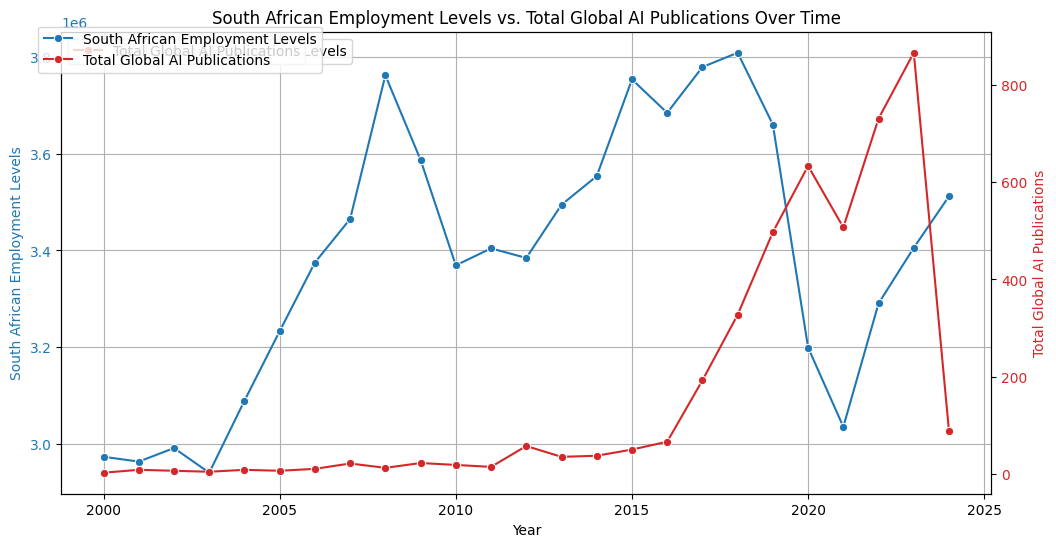

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a primary axes for employment levels
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot employment levels on the primary axes
sns.lineplot(x='year', y='LFEAICTTZAA647S', data=merged_df, ax=ax1, marker='o', label='South African Employment Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('South African Employment Levels', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('South African Employment Levels vs. Total Global AI Publications Over Time')
ax1.grid(True)

# Create a secondary axes for AI publications
ax2 = ax1.twinx()

# Plot AI publications on the secondary axes
sns.lineplot(x='year', y='total_global_publications', data=merged_df, ax=ax2, marker='o', color='tab:red', label='Total Global AI Publications')
ax2.set_ylabel('Total Global AI Publications', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()

Visualizing the trends using a bar graph.

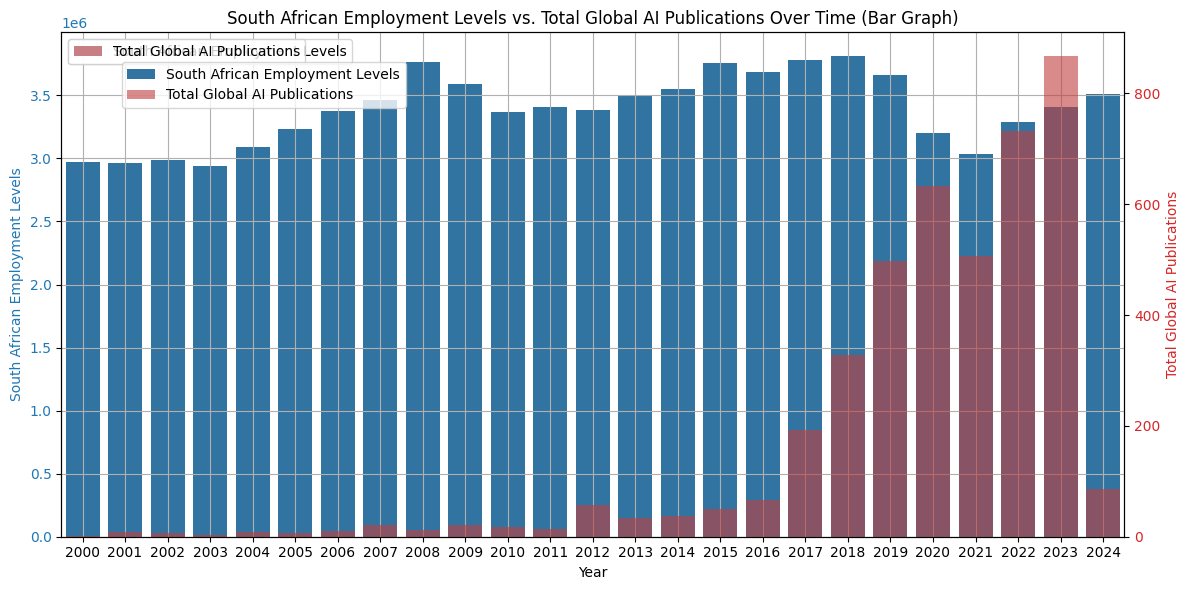

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure and a primary axes for employment levels
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot employment levels as a bar graph on the primary axes
sns.barplot(x='year', y='LFEAICTTZAA647S', data=merged_df, ax=ax1, color='tab:blue', label='South African Employment Levels')
ax1.set_xlabel('Year')
ax1.set_ylabel('South African Employment Levels', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_title('South African Employment Levels vs. Total Global AI Publications Over Time (Bar Graph)')
ax1.grid(True)

# Create a secondary axes for AI publications
ax2 = ax1.twinx()

# Plot AI publications as a bar graph on the secondary axes
sns.barplot(x='year', y='total_global_publications', data=merged_df, ax=ax2, color='tab:red', alpha=0.6, label='Total Global AI Publications')
ax2.set_ylabel('Total Global AI Publications', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45, ha='right')

# Add legends
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.tight_layout()
plt.show()

Generating a heatmap of the correlation matrix for the merged dataset.

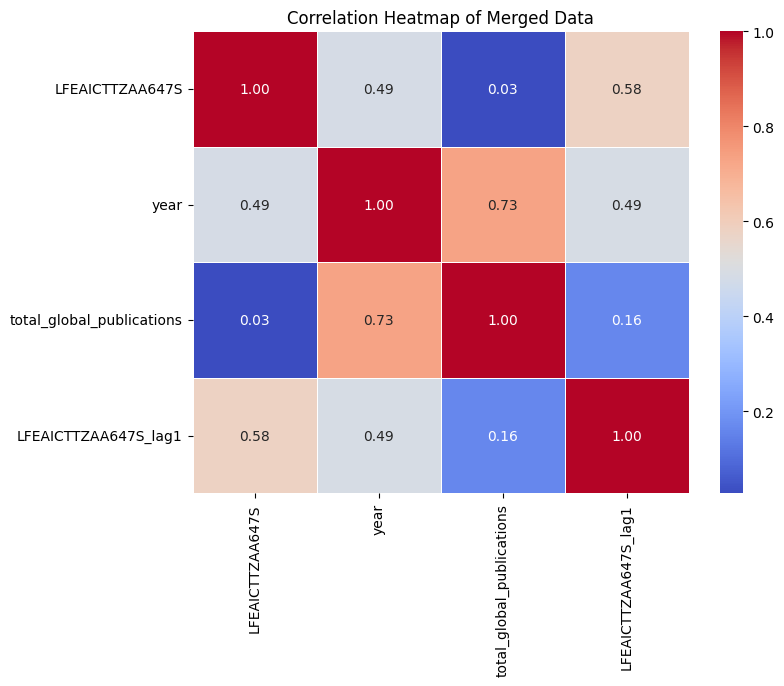

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = merged_df.corr(numeric_only=True)

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Merged Data')
plt.show()

Calculating the correlation coefficient between South African Employment Levels and Total Global AI Publications.

In [29]:
correlation = merged_df['LFEAICTTZAA647S'].corr(merged_df['total_global_publications'])

print(f"Correlation coefficient between South African Employment Levels and Total Global AI Publications: {correlation}")

Correlation coefficient between South African Employment Levels and Total Global AI Publications: 0.027238842510442597


Creating a lagged feature for South African Employment Levels.

In [30]:
# Create a lagged feature for South African Employment Levels
# Shift the column by 1 to get the previous year's value
merged_df['LFEAICTTZAA647S_lag1'] = merged_df['LFEAICTTZAA647S'].shift(1)

print("Merged DataFrame with lagged feature (head):")
display(merged_df.head())

Merged DataFrame with lagged feature (head):


,observation_date,LFEAICTTZAA647S,year,total_global_publications,LFEAICTTZAA647S_lag1
0,2000-01-01,2973000.0,2000,2.0,NaN
1,2001-01-01,2963000.0,2001,8.0,2973000.0
2,2002-01-01,2991000.0,2002,6.0,2963000.0
3,2003-01-01,2940000.0,2003,4.0,2991000.0
4,2004-01-01,3089000.0,2004,8.0,2940000.0


Filling NaN values in the lagged employment feature with 0.

In [31]:
# Fill NaN values in the lagged column with 0
merged_df['LFEAICTTZAA647S_lag1'] = merged_df['LFEAICTTZAA647S_lag1'].fillna(0)

print("Merged DataFrame after filling NaN (head):")
display(merged_df.head())

Merged DataFrame after filling NaN (head):


,observation_date,LFEAICTTZAA647S,year,total_global_publications,LFEAICTTZAA647S_lag1
0,2000-01-01,2973000.0,2000,2.0,0.0
1,2001-01-01,2963000.0,2001,8.0,2973000.0
2,2002-01-01,2991000.0,2002,6.0,2963000.0
3,2003-01-01,2940000.0,2003,4.0,2991000.0
4,2004-01-01,3089000.0,2004,8.0,2940000.0


Preparing the data for model training by defining features (X) and the target variable (y).

In [32]:
# Define features (X) and target variable (y)
features = ['year', 'total_global_publications', 'LFEAICTTZAA647S_lag1']
target = 'LFEAICTTZAA647S'

X = merged_df[features]
y = merged_df[target]

print("Features (X) head:")
display(X.head())

print("\nTarget (y) head:")
display(y.head())

Features (X) head:


,year,total_global_publications,LFEAICTTZAA647S_lag1
0,2000,2.0,0.0
1,2001,8.0,2973000.0
2,2002,6.0,2963000.0
3,2003,4.0,2991000.0
4,2004,8.0,2940000.0



Target (y) head:


,LFEAICTTZAA647S
0,2973000.0
1,2963000.0
2,2991000.0
3,2940000.0
4,3089000.0


Visualizing the historical South African Employment Levels and the Linear Regression forecast.

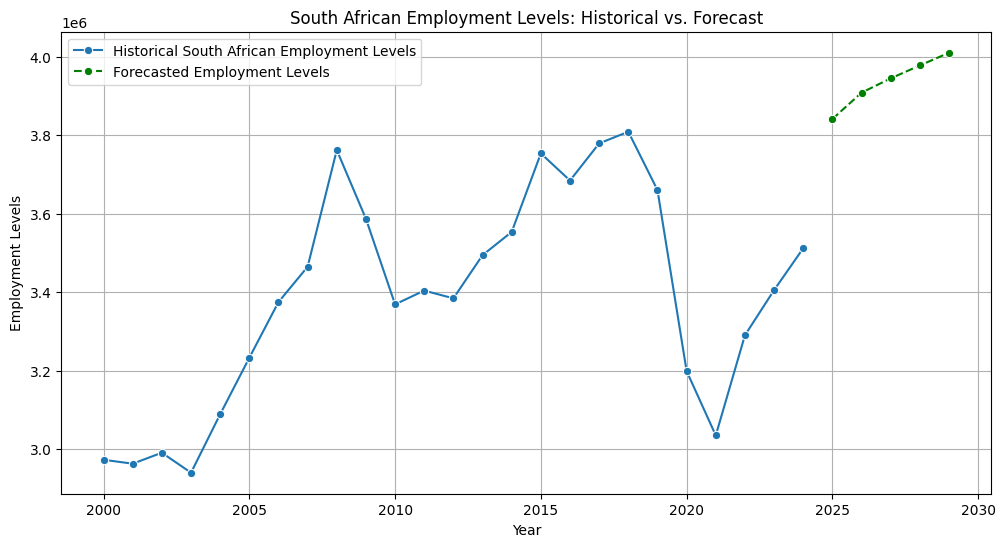

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot historical employment levels
sns.lineplot(x='year', y='LFEAICTTZAA647S', data=merged_df, marker='o', label='Historical South African Employment Levels')

# Plot forecasted employment levels
sns.lineplot(x='year', y='predicted_employment', data=future_forecast_df, marker='o', linestyle='--', color='green', label='Forecasted Employment Levels')

plt.xlabel('Year')
plt.ylabel('Employment Levels')
plt.title('South African Employment Levels: Historical vs. Forecast')
plt.grid(True)
plt.legend()
plt.show()

Selecting and training a Linear Regression model for forecasting employment levels.

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # Although we won't split chronologically for speed now, keep for future

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model using the entire dataset for simplicity and speed
# In a real scenario, a chronological split (e.g., using the last few years for testing)
# would be more appropriate for time series forecasting evaluation.
model.fit(X, y)

print("Linear Regression model trained successfully.")

# We can now use this model to make predictions.
# For a quick forecast example, let's predict for a few years beyond the last data point (2024)

# Create future years' data for prediction
future_years = pd.DataFrame({
    'year': range(2025, 2030),
    'total_global_publications': [merged_df['total_global_publications'].iloc[-1]] * 5, # Assuming last known publication value for future
    # For lagged employment, we'd ideally need predicted employment for the previous year.
    # For this quick example, we'll use the last known employment value as a placeholder for the first future year,
    # and then potentially chain predictions or use a more sophisticated approach for subsequent years.
    'LFEAICTTZAA647S_lag1': [merged_df['LFEAICTTZAA647S'].iloc[-1]] + [0] * 4 # Placeholder for demonstration
})

# A more robust way to handle lagged features for future forecasting:
# Predict 2025 using 2024's actual employment as lag1.
# Then predict 2026 using the predicted 2025 employment as lag1, and so on.

# Let's do a step-by-step prediction for the next few years
last_employment = merged_df['LFEAICTTZAA647S'].iloc[-1]
last_publications = merged_df['total_global_publications'].iloc[-1]
future_predictions = []

print("\nForecasting future employment levels:")
for year in range(2025, 2030):
    future_features = pd.DataFrame({
        'year': [year],
        'total_global_publications': [last_publications], # Using last known publications
        'LFEAICTTZAA647S_lag1': [last_employment]
    })
    predicted_employment = model.predict(future_features)[0]
    future_predictions.append({'year': year, 'predicted_employment': predicted_employment})

    # Update last_employment for the next iteration's lagged feature
    last_employment = predicted_employment

future_forecast_df = pd.DataFrame(future_predictions)
display(future_forecast_df)

Linear Regression model trained successfully.

Forecasting future employment levels:


,year,predicted_employment
0,2025,3.841563e+06
1,2026,3.908688e+06
2,2027,3.945159e+06
3,2028,3.978047e+06
4,2029,4.010516e+06
